In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.special import expit
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier

No handles with labels found to put in legend.


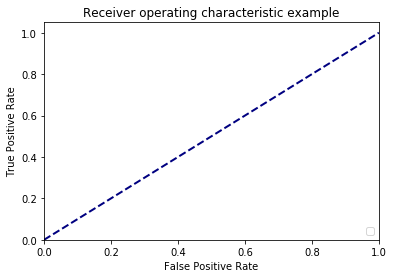

[[ 1.02017863 -0.92669958 -5.67991875]
 [ 1.14923252 -0.87978754 -5.94103685]
 [ 1.0216576  -0.75697712 -5.63968671]
 [ 1.10831434 -0.95619564 -6.08738018]
 [ 0.85809442 -1.10738962 -5.71734766]
 [ 1.1114366  -0.8488372  -5.8586029 ]
 [ 1.01070227 -0.91896858 -5.83250039]
 [ 1.08147375 -0.71844741 -5.62708442]
 [ 0.99963738 -0.82645718 -5.73472295]
 [ 0.9791509  -0.79341125 -5.7207191 ]
 [ 1.06104204 -0.82790143 -5.78743161]
 [ 1.32862618 -0.74180835 -6.15708617]
 [ 1.02346526 -1.30595681 -6.28617989]
 [ 1.1100672  -1.27306252 -6.18942606]
 [ 1.05014149 -1.05708937 -5.91143723]
 [ 0.81876475 -1.17896526 -5.74395381]
 [ 1.0390766  -1.0093844  -5.99870792]
 [ 0.82183224 -1.00441033 -5.58398458]
 [ 0.99662467 -1.06820858 -5.82588412]
 [ 1.42317075 -0.95359034 -6.57193519]
 [ 0.77625803 -1.05048304 -5.21173083]
 [ 0.79017131 -0.66915658 -5.3666603 ]
 [ 0.87847133 -0.88593268 -5.4407604 ]
 [ 0.89742407 -0.99100754 -5.50569339]
 [ 0.99656989 -1.0010121  -5.89469218]
 [ 1.04225365 -1.04452591

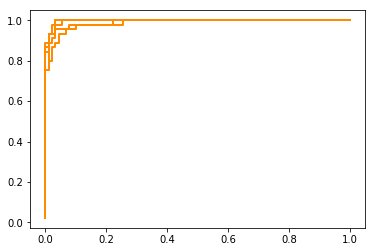

In [37]:
input_file = '/home/hurben/AnalysisLibrary/machine_learning/test_run/data.list'
#print (iris_dataframe.iloc[:,1])
#print (iris_dataframe.iloc[:,4])

input_file = open(input_file,'r')
input_readlines = input_file.readlines()

plt.figure()
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

for i in range(len(input_readlines)):

    read = input_readlines[i]
    read = read.replace('\n','')

    token = read.split('\t')
    train_data = token[0]
    test_data = token[1]

   #print (train_data)
    train_dataframe = pd.read_csv(train_data, sep='\t')
    x_test = train_dataframe.iloc[:,:-1].values
    y_test = train_dataframe.iloc[:,-1].values
    #important note : .values is necessary because we neet to make it as array.
    #not as a dataframe

    test_dataframe = pd.read_csv(test_data, sep='\t')
    x_train = test_dataframe.iloc[:,:-1].values
    y_train = test_dataframe.iloc[:,-1].values
    
    y_test = label_binarize(y_test, classes=[0,1,2])
    y_train = label_binarize(y_train, classes=[0,1,2])
    
    n_classes = y_train.shape[1]
    
#     clf = svm.SVC(kernel='linear', probability=True)
#     y_score = clf.fit(x_train, y_train)
#     predict = clf.predict(x_test)
#     accuracy = sum(1 for x,y in zip(predict,y_test) if x == y) / float(len(y_test))
#     print ('##################')
#     print(predict)
#     print(accuracy)
#     print ('##################')

    cv = StratifiedKFold(n_splits=5)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
    y_score = classifier.fit(x_train, y_train).decision_function(x_test)
    print (y_score)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    

    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
